# Assignment 5
## Sudeep Bhattarai (0905601)

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Setting random seed for reproducibility
np.random.seed(42)

In [ ]:
# Step 1: Loading the IMDB Dataset
max_features = 10000  # Use the top 10,000 most frequent words
max_len = 200         # Pad or truncate reviews to 200 words

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [5]:
# Step 2: Preprocess the Data
x_train = pad_sequences(x_train, maxlen=max_len)  # Pad training data
x_test = pad_sequences(x_test, maxlen=max_len)    # Pad test data

In [ ]:
# Splitting the training data further into training and validation sets
x_train_partial, x_val, y_train_partial, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Defining the RNN Model
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len, name="Embedding_Layer"),
    Bidirectional(LSTM(128, return_sequences=False, name="LSTM_Layer")),  # Bidirectional LSTM for better context
    Dropout(0.5, name="Dropout_Layer_1"),  # Regularization
    Dense(64, activation='relu', name="Fully_Connected_Layer"),  # Fully connected layer
    Dropout(0.5, name="Dropout_Layer_2"),  # Regularization
    Dense(1, activation='sigmoid', name="Output_Layer")  # Output layer for binary classification
])

c:\Users\Cobot\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Printing model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Embedding_Layer (Embedding)     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer_1 (Dropout)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_Layer (Dense)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer_2 (Dropout)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Compiling the Model
model.compile(
    optimizer='adam',  # Adaptive Moment Estimation optimizer
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Accuracy as the evaluation metric
)

In [ ]:
# Step 5: Training the Model with Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop training if no improvement for 3 epochs
    restore_best_weights=True  # Restore the weights of the best epoch
)

In [11]:
history = model.fit(
    x_train_partial, y_train_partial,  # Training data
    validation_data=(x_val, y_val),    # Validation data
    epochs=10,                         # Maximum number of epochs
    batch_size=32,                     # Number of samples per batch
    callbacks=[early_stopping]         # Use early stopping
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 153ms/step - accuracy: 0.6722 - loss: 0.5714 - val_accuracy: 0.8458 - val_loss: 0.3694
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 175ms/step - accuracy: 0.8822 - loss: 0.2958 - val_accuracy: 0.8594 - val_loss: 0.3306
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 110s 175ms/step - accuracy: 0.9348 - loss: 0.1817 - val_accuracy: 0.8688 - val_loss: 0.3295
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 110s 176ms/step - accuracy: 0.9519 - loss: 0.1311 - val_accuracy: 0.8452 - val_loss: 0.4874
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 180ms/step - accuracy: 0.9673 - loss: 0.0957 - val_accuracy: 0.8468 - val_loss: 0.4617
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 178ms/step - accuracy: 0.9794 - loss: 0.0598 - val_accuracy: 0.8492 - val_loss: 0.6382


In [ ]:
# Step 6: Evaluating the Model on Test Data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.8613 - loss: 0.3474
Test Loss: 0.3449, Test Accuracy: 0.8632


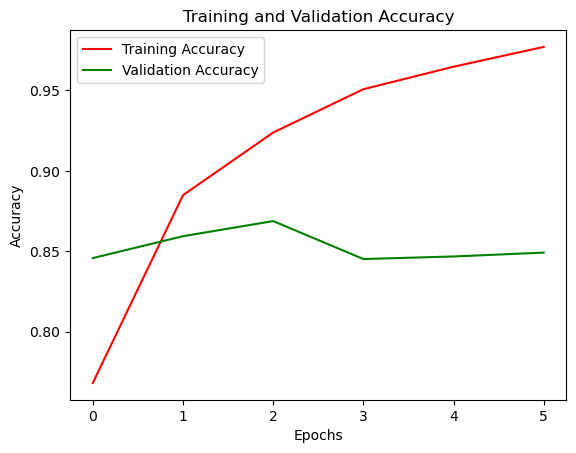

In [ ]:
# Step 7: Visualizing Training Performance
# Plotted training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

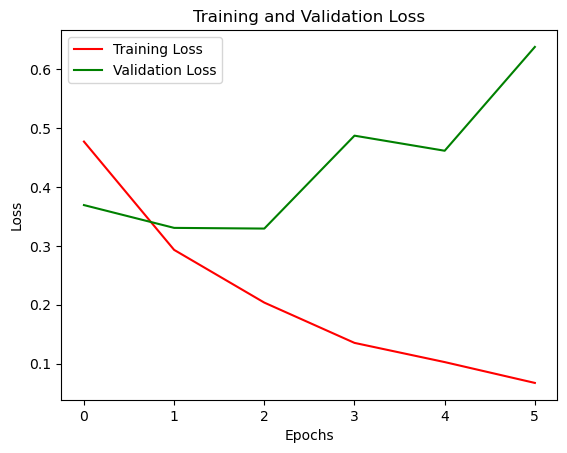

In [ ]:
# Ploted training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 8: Comparing with a Feedforward Neural Network
# Flatten the input for FFN
from tensorflow.keras.layers import Flatten

model_ffn = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len, name="Embedding_Layer_FFN"),
    Flatten(name="Flatten_Layer"),  # Flatten the input for FFN
    Dense(128, activation='relu', name="Hidden_Layer_1_FFN"),
    Dropout(0.5, name="Dropout_Layer_FFN"),
    Dense(1, activation='sigmoid', name="Output_Layer_FFN")
])

In [ ]:
# Compiling the FFN model
model_ffn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Trainning the FFN model
history_ffn = model_ffn.fit(
    x_train_partial, y_train_partial,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.7012 - loss: 0.5284 - val_accuracy: 0.8644 - val_loss: 0.3127
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9734 - loss: 0.0859 - val_accuracy: 0.8458 - val_loss: 0.4428
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9966 - loss: 0.0128 - val_accuracy: 0.8494 - val_loss: 0.5823
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9996 - loss: 0.0027 - val_accuracy: 0.8496 - val_loss: 0.6715


In [ ]:
# Evaluating the FFN model
test_loss_ffn, test_accuracy_ffn = model_ffn.evaluate(x_test, y_test)
print(f"FFN Test Loss: {test_loss_ffn:.4f}, Test Accuracy: {test_accuracy_ffn:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8583 - loss: 0.3247
FFN Test Loss: 0.3227, Test Accuracy: 0.8605


In [ ]:
# Step 9: Comparing Performance
print("Comparison of RNN and FFN:")
print(f"RNN Test Accuracy: {test_accuracy:.4f}")
print(f"FFN Test Accuracy: {test_accuracy_ffn:.4f}")

Comparison of RNN and FFN:
RNN Test Accuracy: 0.8632
FFN Test Accuracy: 0.8605


In [ ]:
# Step 10: Summarizing Findings
if test_accuracy > test_accuracy_ffn:
    print("RNN performs better than FFN for this sentiment analysis task.")
else:
    print("FFN performs better than RNN for this sentiment analysis task.")

RNN performs better than FFN for this sentiment analysis task.
